In [2]:
!pip install tqdm
!pip install sklearn
!pip install h2o
!pip install gensim

You should consider upgrading via the '/mnt/bert_fine_tuning/cluster_env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/mnt/bert_fine_tuning/cluster_env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/mnt/bert_fine_tuning/cluster_env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/mnt/bert_fine_tuning/cluster_env/bin/python -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import nltk
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import cross_val_score
import re
import codecs
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

import h2o
h2o.init()
from h2o.estimators import H2OTargetEncoderEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

from gensim.models import FastText
from gensim.test.utils import common_texts

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,14 hours 6 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.5
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_slintel_pqfo9r
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,13.73 Gb
H2O_cluster_total_cores:,6
H2O_cluster_allowed_cores:,6
H2O_cluster_status:,"locked, healthy"


/mnt/bert_fine_tuning/cluster_env/lib/python3.6/site-packages/gensim/similarities/__init__.py:15: UserWarning:

The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.



In [ ]:
!pip insta

In [2]:
import torch

ModuleNotFoundError: No module named 'torch'

In [1]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
device

NameError: name 'torch' is not defined

In [5]:
smaller_data=pd.read_csv("../data/50k_data_crunchbase.csv")

In [6]:
eng_rows = list(smaller_data['_id'])

In [7]:
larger_data = pd.read_csv(r'../data/6lakh_pipeline_company_companies_data_2021-07-21.csv')

/mnt/bert_fine_tuning/cluster_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



In [8]:
larger_data = larger_data[['company_city', 'company_country', 'company_state', 'company_name',
       'company_products_services', 'company_industry', 'company_size',
       'company_type', 'company_founded_at', 'company_continent',
       'company_address', 'revenue_range', 'rank', '_id', 'company_funding',
       'lead_count', 'job_count', 'cb_id', 'linkedin_employee_count',
       'linkedin_follower_count', 'company_description',
       'company_latest_funding_date', 'created_at', 'company_sector']]

In [9]:
larger_data = larger_data[larger_data._id.isin(eng_rows)]

In [10]:
df = larger_data

In [11]:
df = df.reset_index()

In [12]:
df.columns

Index(['index', 'company_city', 'company_country', 'company_state',
       'company_name', 'company_products_services', 'company_industry',
       'company_size', 'company_type', 'company_founded_at',
       'company_continent', 'company_address', 'revenue_range', 'rank', '_id',
       'company_funding', 'lead_count', 'job_count', 'cb_id',
       'linkedin_employee_count', 'linkedin_follower_count',
       'company_description', 'company_latest_funding_date', 'created_at',
       'company_sector'],
      dtype='object')

In [13]:
n = len(pd.unique(df['created_at']))
n

1107

In [14]:
df = df.drop(['company_products_services', 'company_founded_at','lead_count', 'cb_id', 'company_latest_funding_date', 'created_at'], axis = 1)

In [15]:
len(df)

50059

## Missing Values

In [16]:
data = df
# checking missing data percentage in data
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_Data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [17]:
print("\n ******* Missing Values in the Data ******* \n\n",missing_Data)


 ******* Missing Values in the Data ******* 

                          Total    Percent
linkedin_follower_count  16659  33.278731
company_funding          10973  21.920134
linkedin_employee_count   7788  15.557642
company_type              7555  15.092191
company_address           5101  10.189976
company_state             1640   3.276134
company_city              1424   2.844643
company_size              1375   2.746759
company_country           1014   2.025610
company_continent         1014   2.025610
rank                         4   0.007991
company_name                 1   0.001998
company_industry             0   0.000000
company_sector               0   0.000000
company_description          0   0.000000
revenue_range                0   0.000000
_id                          0   0.000000
job_count                    0   0.000000
index                        0   0.000000


In [18]:
print("Data Types of the columns are:\n\n", data.dtypes)

Data Types of the columns are:

 index                        int64
company_city                object
company_country             object
company_state               object
company_name                object
company_industry            object
company_size                object
company_type                object
company_continent           object
company_address             object
revenue_range               object
rank                       float64
_id                         object
company_funding            float64
job_count                    int64
linkedin_employee_count    float64
linkedin_follower_count    float64
company_description         object
company_sector              object
dtype: object


In [19]:
df = df.apply(lambda x: x.fillna('unkown') if x.dtype.kind == 'O' else x.fillna(x.mean()))

In [20]:
data = df
# checking missing data percentage in data
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_Data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("\n ******* Missing Values in the Data ******* \n\n",missing_Data)


 ******* Missing Values in the Data ******* 

                          Total  Percent
company_sector               0      0.0
company_continent            0      0.0
company_city                 0      0.0
company_country              0      0.0
company_state                0      0.0
company_name                 0      0.0
company_industry             0      0.0
company_size                 0      0.0
company_type                 0      0.0
company_address              0      0.0
company_description          0      0.0
revenue_range                0      0.0
rank                         0      0.0
_id                          0      0.0
company_funding              0      0.0
job_count                    0      0.0
linkedin_employee_count      0      0.0
linkedin_follower_count      0      0.0
index                        0      0.0


In [21]:
a = df.nunique()
a = a.sort_values()
a

company_continent              7
company_sector                 8
company_size                   9
company_type                   9
revenue_range                  9
company_industry             147
company_country              148
job_count                    345
company_state               1083
linkedin_employee_count     1820
company_funding             4756
linkedin_follower_count     6927
company_city                7416
company_address            43806
company_description        50007
company_name               50033
rank                       50049
_id                        50059
index                      50059
dtype: int64

In [22]:
categorical = []
keep = []
for i in a.index:
    if df[i].dtype.kind == 'O':
        categorical.append(i)
    else:
        keep.append(i)
        
print(categorical, len(categorical) + len(keep), len(a))

['company_continent', 'company_sector', 'company_size', 'company_type', 'revenue_range', 'company_industry', 'company_country', 'company_state', 'company_city', 'company_address', 'company_description', 'company_name', '_id'] 19 19


In [23]:
categorical.remove('company_description')
keep.append('company_description')

## Target Encoding

In [24]:
post = '_encoded'
cat_to_actual = {}
actual_to_cat = {}
for i in categorical:
    col_name = i + post
    keep.append(col_name)
    df[col_name] = df[i].factorize()[0]

In [25]:
keep

['job_count',
 'linkedin_employee_count',
 'company_funding',
 'linkedin_follower_count',
 'rank',
 'index',
 'company_description',
 'company_continent_encoded',
 'company_sector_encoded',
 'company_size_encoded',
 'company_type_encoded',
 'revenue_range_encoded',
 'company_industry_encoded',
 'company_country_encoded',
 'company_state_encoded',
 'company_city_encoded',
 'company_address_encoded',
 'company_name_encoded',
 '_id_encoded']

In [26]:
df.head()

,index,company_city,company_country,company_state,company_name,company_industry,company_size,company_type,company_continent,company_address,...,company_size_encoded,company_type_encoded,revenue_range_encoded,company_industry_encoded,company_country_encoded,company_state_encoded,company_city_encoded,company_address_encoded,company_name_encoded,_id_encoded
0,0,San Francisco,United States,California,ProLeads io,Information Technology and Services,1-10,Private,North America,1186 Folsom Street,...,0,0,0,0,0,0,0,0,0,0
1,28,Radnor,United States,Pennsylvania,"Essent Guaranty, Inc",Insurance,201-500,Public,North America,Two Radnor Corporate Center 100 Matsonford Road,...,1,1,1,1,0,1,1,1,1,1
2,46,Arlington,United States,Virginia,WDG,Marketing and Advertising,11-50,Private,North America,3100 Clarendon Blvd Suite 510,...,2,0,2,2,0,2,2,2,2,2
3,55,Hamilton,New Zealand,Waikato,Code Avengers,E-Learning,11-50,Educational Institution,Oceania,39 Newcastle Road,...,2,2,3,3,1,3,3,3,3,3
4,58,New York,United States,New York,Techradar India,Online Media,201-500,Public,North America,11 West 42nd Street 15th Floor,...,1,1,2,4,0,4,4,4,4,4


## Train - Test Split

In [39]:
a = sorted(df.columns)
a

['_id',
 '_id_encoded',
 'company_address',
 'company_address_encoded',
 'company_city',
 'company_city_encoded',
 'company_continent',
 'company_continent_encoded',
 'company_country',
 'company_country_encoded',
 'company_description',
 'company_funding',
 'company_industry',
 'company_name',
 'company_name_encoded',
 'company_sector',
 'company_sector_encoded',
 'company_size',
 'company_size_encoded',
 'company_state',
 'company_state_encoded',
 'company_type',
 'company_type_encoded',
 'job_count',
 'linkedin_employee_count',
 'linkedin_follower_count',
 'rank',
 'revenue_range',
 'revenue_range_encoded']

In [51]:
sorted(keep)

['_id',
 'category_id',
 'company_address_encoded',
 'company_city_encoded',
 'company_continent_encoded',
 'company_country_encoded',
 'company_description',
 'company_funding',
 'company_name',
 'company_sector_encoded',
 'company_size_encoded',
 'company_state_encoded',
 'company_type_encoded',
 'job_count',
 'linkedin_employee_count',
 'linkedin_follower_count',
 'rank',
 'revenue_range_encoded']

In [45]:
finaldf = df[keep]

In [52]:
keep.remove('category_id')

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df[keep],df['category_id'], test_size = 0.25, random_state = 0, shuffle = True, stratify = df['company_industry'])

In [60]:
X_train.to_csv('X_train.csv', index = False)
X_test.to_csv('X_test.csv', index = False)
y_train.to_csv('y_train.csv', index = False)
y_test.to_csv('y_test.csv', index = False)

In [59]:
y_train

43527    107
12955     62
46226      0
10174     19
28101      9
        ... 
23305     17
32428     47
7573      10
7117     110
18323      2
Name: category_id, Length: 37544, dtype: int64

## TF-IDF

In [23]:
df.columns

Index(['index', 'company_city', 'company_country', 'company_state',
       'company_name', 'company_industry', 'company_size', 'company_type',
       'company_continent', 'company_address', 'revenue_range', 'rank', '_id',
       'company_funding', 'job_count', 'linkedin_employee_count',
       'linkedin_follower_count', 'company_description', 'company_sector',
       'company_continent_encoded', 'company_sector_encoded',
       'company_size_encoded', 'company_type_encoded', 'revenue_range_encoded',
       'company_industry_encoded', 'company_country_encoded',
       'company_state_encoded', 'company_city_encoded',
       'company_address_encoded', 'company_name_encoded', '_id_encoded'],
      dtype='object')

In [44]:
from io import StringIO
col = ['company_industry', 'company_description']
#df = df[col]
df = df[pd.notnull(df['company_description'])]
#df.columns = ['company_industry', 'company_description']
df['category_id'] = df['company_industry'].factorize()[0]
category_id_df = df[['company_industry', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'company_industry']].values)
df.head()

,company_city,company_country,company_state,company_name,company_industry,company_size,company_type,company_continent,company_address,revenue_range,...,company_size_encoded,company_type_encoded,revenue_range_encoded,company_country_encoded,company_state_encoded,company_city_encoded,company_address_encoded,company_name_encoded,_id_encoded,category_id
0,San Francisco,United States,California,ProLeads io,Information Technology and Services,1-10,Private,North America,1186 Folsom Street,Unknown,...,0,0,0,0,0,0,0,0,0,0
1,Radnor,United States,Pennsylvania,"Essent Guaranty, Inc",Insurance,201-500,Public,North America,Two Radnor Corporate Center 100 Matsonford Road,10M-50M,...,1,1,1,0,1,1,1,1,1,1
2,Arlington,United States,Virginia,WDG,Marketing and Advertising,11-50,Private,North America,3100 Clarendon Blvd Suite 510,<1M,...,2,0,2,0,2,2,2,2,2,2
3,Hamilton,New Zealand,Waikato,Code Avengers,E-Learning,11-50,Educational Institution,Oceania,39 Newcastle Road,1M-10M,...,2,2,3,1,3,3,3,3,3,3
4,New York,United States,New York,Techradar India,Online Media,201-500,Public,North America,11 West 42nd Street 15th Floor,<1M,...,1,1,2,0,4,4,4,4,4,4


In [ ]:
df = df.drop(['company_industry_encoded', 'index'], axis = 1)

In [62]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', max_features=5000,
                        encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.company_description).toarray()
labels = df.category_id
features.shape

(50059, 5000)

In [27]:
keep.append('features')

## Fast Text


# Multivariate Classification:

In [33]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Accounting':
  . Most correlated unigrams:
. tax
. accounting
  . Most correlated bigrams:
. advisory services
. business consulting
# 'Airlines/Aviation':
  . Most correlated unigrams:
. airlines
. aviation
  . Most correlated bigrams:
. customers world
. low cost
# 'Alternative Dispute Resolution':
  . Most correlated unigrams:
. alternative
. resolution
  . Most correlated bigrams:
. non profit
. profit organization
# 'Alternative Medicine':
  . Most correlated unigrams:
. medicine
. cannabis
  . Most correlated bigrams:
. quality management
. sq ft
# 'Animation':
  . Most correlated unigrams:
. productions
. animation
  . Most correlated bigrams:
. video production
. virtual reality
# 'Apparel & Fashion':
  . Most correlated unigrams:
. fashion
. apparel
  . Most correlated bigrams:
. shopping experience
. men women
# 'Architecture & Planning':
  . Most correlated unigrams:
. architectural
. architecture
  . Most correlated bigrams:
. design firm
. interior design
# 'Arts and Cr

. import
  . Most correlated bigrams:
. providing highest
. hong kong
# 'Individual & Family Services':
  . Most correlated unigrams:
. family
. individual
  . Most correlated bigrams:
. company based
. services company
# 'Industrial Automation':
  . Most correlated unigrams:
. robotics
. automation
  . Most correlated bigrams:
. 3d printing
. control systems
# 'Information Services':
  . Most correlated unigrams:
. data
. information
  . Most correlated bigrams:
. information management
. data management
# 'Information Technology and Services':
  . Most correlated unigrams:
. technology
. cloud
  . Most correlated bigrams:
. technology services
. information technology
# 'Insurance':
  . Most correlated unigrams:
. claims
. insurance
  . Most correlated bigrams:
. insurance products
. insurance company
# 'International Affairs':
  . Most correlated unigrams:
. affairs
. nations
  . Most correlated bigrams:
. marketing company
. global network
# 'International Trade and Development':
 

. services customers
# 'Ranching':
  . Most correlated unigrams:
. breed
. golden
  . Most correlated bigrams:
. attract followers
. representatives don
# 'Real Estate':
  . Most correlated unigrams:
. real
. estate
  . Most correlated bigrams:
. estate company
. real estate
# 'Recreational Facilities and Services':
  . Most correlated unigrams:
. golf
. recreational
  . Most correlated bigrams:
. young people
. year round
# 'Religious Institutions':
  . Most correlated unigrams:
. school
. ministry
  . Most correlated bigrams:
. california united
. make informed
# 'Renewables & Environment':
  . Most correlated unigrams:
. renewable
. solar
  . Most correlated bigrams:
. energy efficiency
. renewable energy
# 'Research':
  . Most correlated unigrams:
. scientists
. research
  . Most correlated bigrams:
. clinical trials
. science technology
# 'Restaurants':
  . Most correlated unigrams:
. restaurants
. restaurant
  . Most correlated bigrams:
. exceptional service
. team members
# 'Ret

In [28]:
for i in df.columns:
    if i not in keep:
        print(i)
        

company_city
company_country
company_state
company_name
company_industry
company_size
company_type
company_continent
company_address
revenue_range
_id
company_sector


In [41]:
for i in keep:
    if i not in df.columns: 
        print(i)

index
company_industry_encoded
features


In [29]:
keep

['job_count',
 'linkedin_employee_count',
 'company_funding',
 'linkedin_follower_count',
 'rank',
 'index',
 'company_description',
 'company_continent_encoded',
 'company_sector_encoded',
 'company_size_encoded',
 'company_type_encoded',
 'revenue_range_encoded',
 'company_industry_encoded',
 'company_country_encoded',
 'company_state_encoded',
 'company_city_encoded',
 'company_address_encoded',
 'company_name_encoded',
 '_id_encoded']

In [30]:
for i in ['_id_encoded' , 'index', 'company_description', 'company_industry_encoded', 'company_name_encoded']:
    if i in keep:
        keep.remove(i)
for i in ['_id', 'company_name', 'category_id']:
    keep.append(i)

In [31]:
keep.remove('_id')

In [33]:
keep.append('_id')

In [32]:
keep.remove('features')

ValueError: list.remove(x): x not in list

In [37]:
train = np.concatenate((df[keep], features),axis = 1)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(train, df['company_industry'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train[keep])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
     MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, train, df['company_industry'], scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

NameError: name 'MultinomialNB' is not defined

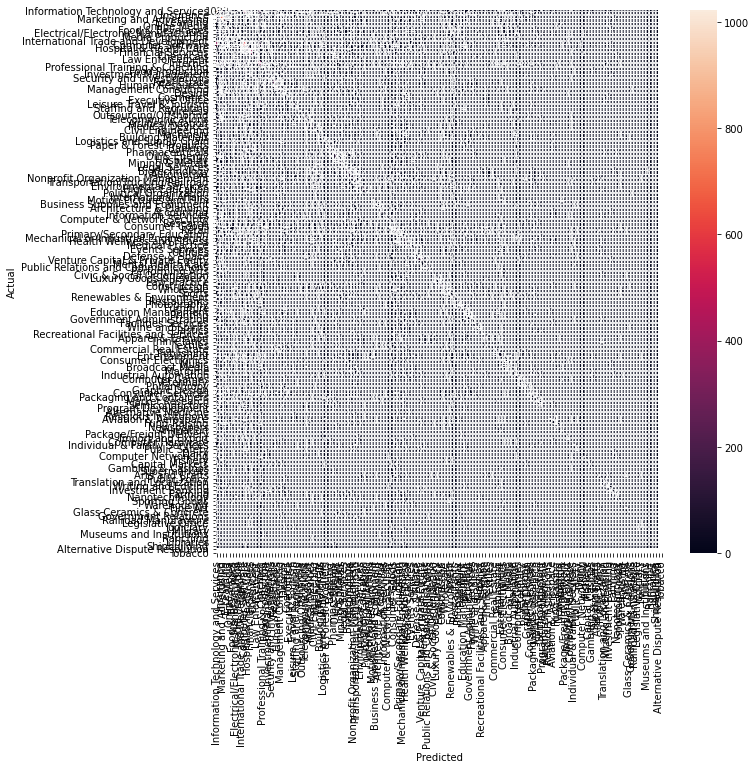

In [40]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.company_industry.values, yticklabels=category_id_df.company_industry.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [41]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['company_industry'].unique()))

ValueError: Number of classes, 145, does not match size of target_names, 147. Try specifying the labels parameter

## ID

In [ ]:
id1=test.loc[:,['Complaint-ID']]
final_ans = [id1, ans]
final_ans = pd.concat(final_ans, axis=1)
final_ans.columns = ['Complaint-ID', 'Complaint-Status']
final_ans.to_csv('submission_logistic_6-12_knn.csv',index=False)

## Precision Recall Curve

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))